<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/03_ARMA_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ ARMA(p, q) 모델을 활용한 테슬라 주가 예측

/tmp/ipython-input-3842266203.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


📌 Training MSE: 87.0286, R²: 0.9756
📌 Test MSE: 9145.4406, R²: -2.0953


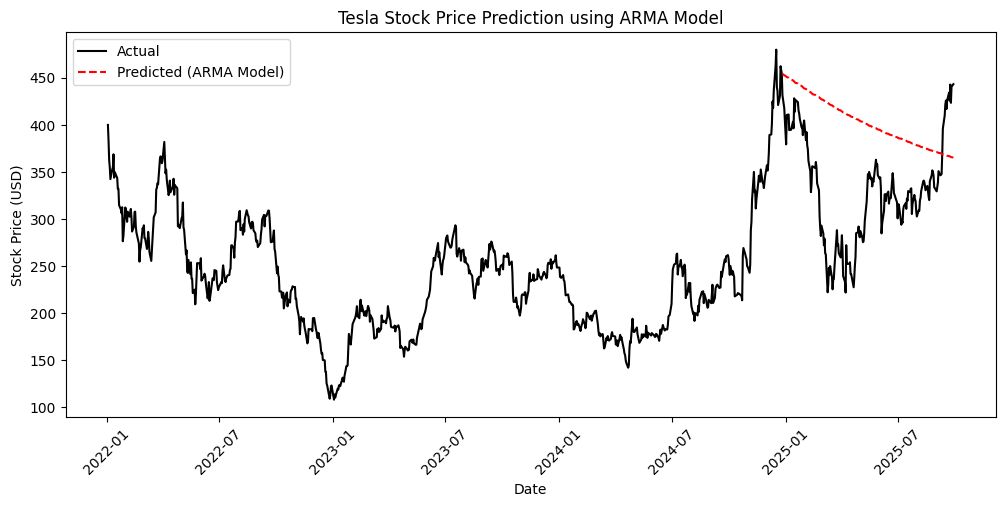

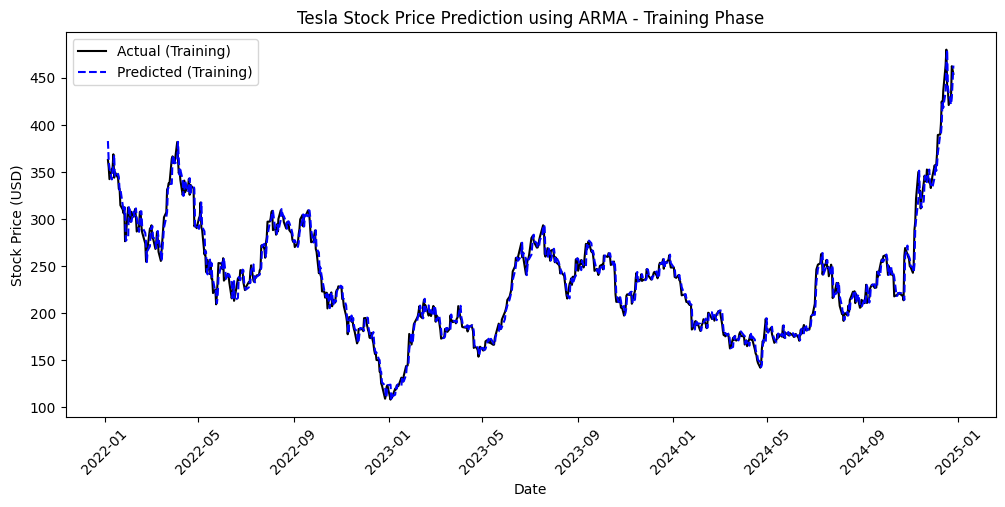

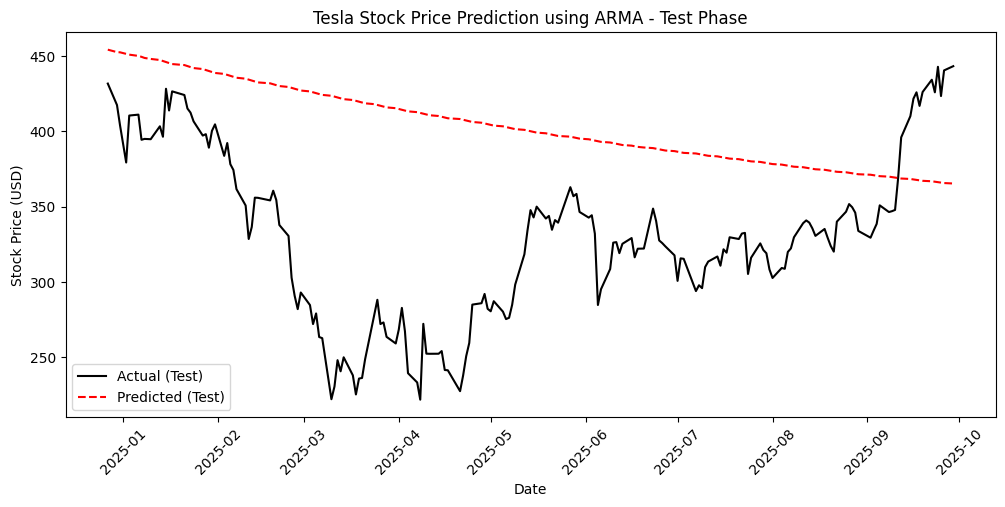

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size].copy(), df.iloc[train_size:].copy()  # ✅ `.copy()` 추가

# 📌 3️⃣ ARMA(p, q) 모델 설정
p = 2  # AR 차수 (과거 데이터 반영 개수)
q = 2  # MA 차수 (과거 오차 반영 개수)

# 📌 4️⃣ ARMA 모델 학습
model = ARIMA(train["Close"], order=(p, 0, q))  # 차분(d=0) 사용하여 ARMA 모델 구축
model_fit = model.fit()

# 📌 5️⃣ 예측 수행
train_pred = model_fit.predict(start=p, end=len(train) - 1)  # 훈련 데이터 예측
test_pred = model_fit.predict(start=len(train), end=len(df) - 1)  # 테스트 데이터 예측

# 📌 6️⃣ 성능 평가
train_actual = train["Close"][p:]  # 실제값
test_actual = test["Close"]

train_mse = mean_squared_error(train_actual, train_pred)
test_mse = mean_squared_error(test_actual, test_pred)
train_r2 = r2_score(train_actual, train_pred)
test_r2 = r2_score(test_actual, test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 7️⃣ 결과 시각화 (전체 데이터 예측)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Actual", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (ARMA Model)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using ARMA Model")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 8️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(train["Date"][p:], train_actual, label="Actual (Training)", color="black")
plt.plot(train["Date"][p:], train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ARMA - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 9️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(test["Date"], test_actual, label="Actual (Test)", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (Test)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using ARMA - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# 📌 1️⃣ 최적의 𝑝 ,𝑞 값 찾기 및 시각화 코드

/tmp/ipython-input-2482000256.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels

✅ 최적의 (p, q) 값: (p=3, q=5)


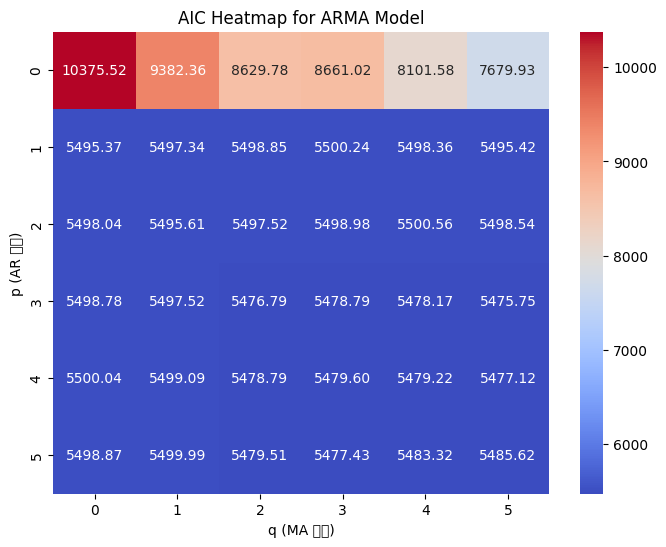

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import arma_order_select_ic

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ 종가 데이터만 추출
train_size = int(len(df) * 0.8)  # 80% 학습 데이터
train = df["Close"][:train_size]

# 📌 3️⃣ 최적의 (p, q) 값 찾기 (AIC 기준)
pq_selection = arma_order_select_ic(train, max_ar=5, max_ma=5, ic='aic', trend='n')
best_p, best_q = pq_selection.aic_min_order

# 📌 4️⃣ 결과 출력
print(f"✅ 최적의 (p, q) 값: (p={best_p}, q={best_q})")

# 📌 5️⃣ AIC 결과를 시각화
aic_matrix = pq_selection.aic  # AIC 값 행렬
plt.figure(figsize=(8, 6))
sns.heatmap(aic_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=range(aic_matrix.shape[1]), yticklabels=range(aic_matrix.shape[0]))
plt.xlabel("q (MA 차수)")
plt.ylabel("p (AR 차수)")
plt.title("AIC Heatmap for ARMA Model")
plt.show()


# ✅ 최적의 (𝑝,𝑞) 값 찾기 + ARMA 모델 적용 코드

/tmp/ipython-input-757696155.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels

✅ 최적의 (p, q) 값: (p=3, q=5)


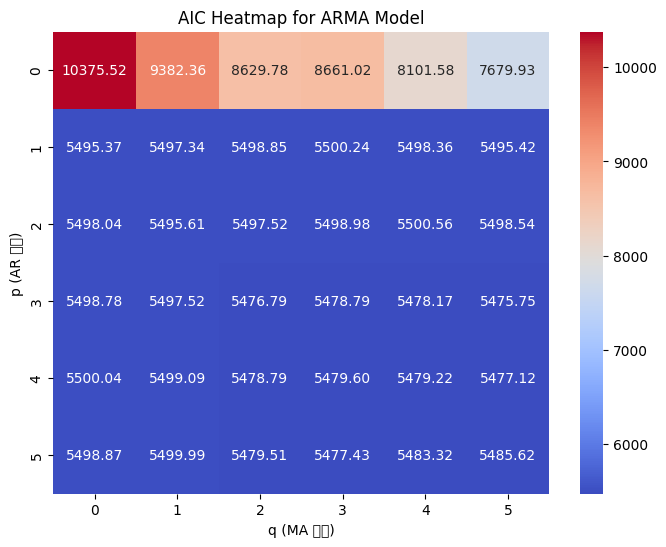

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


📌 Training MSE: 85.5390, R²: 0.9759
📌 Test MSE: 5678.5324, R²: -0.9219


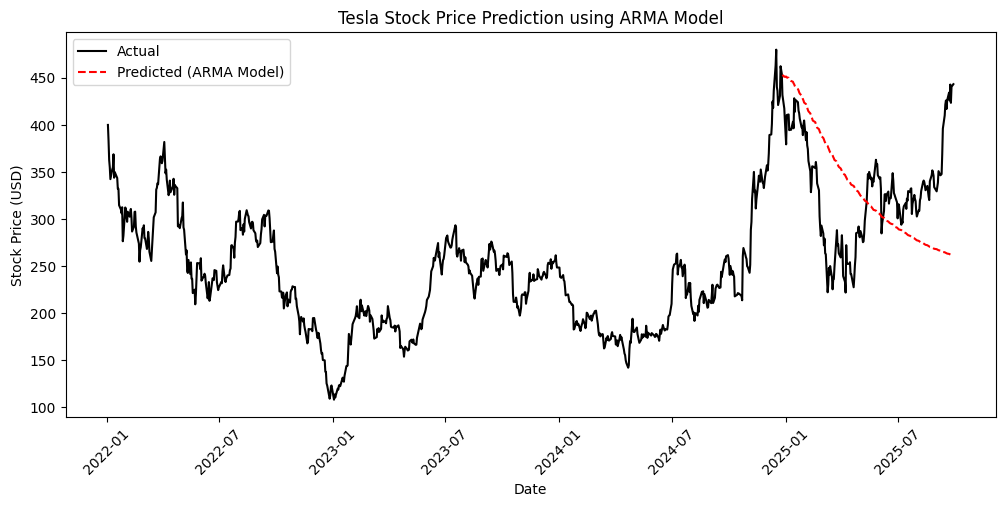

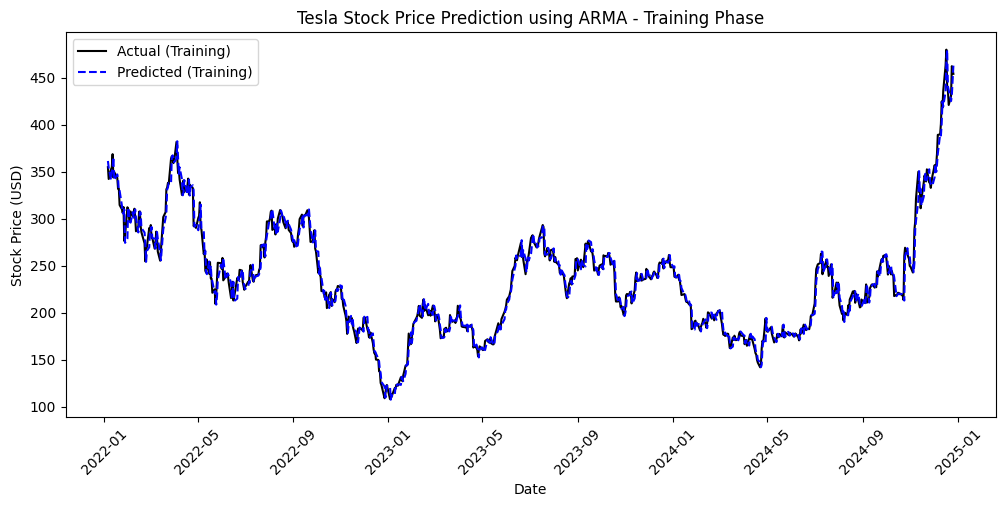

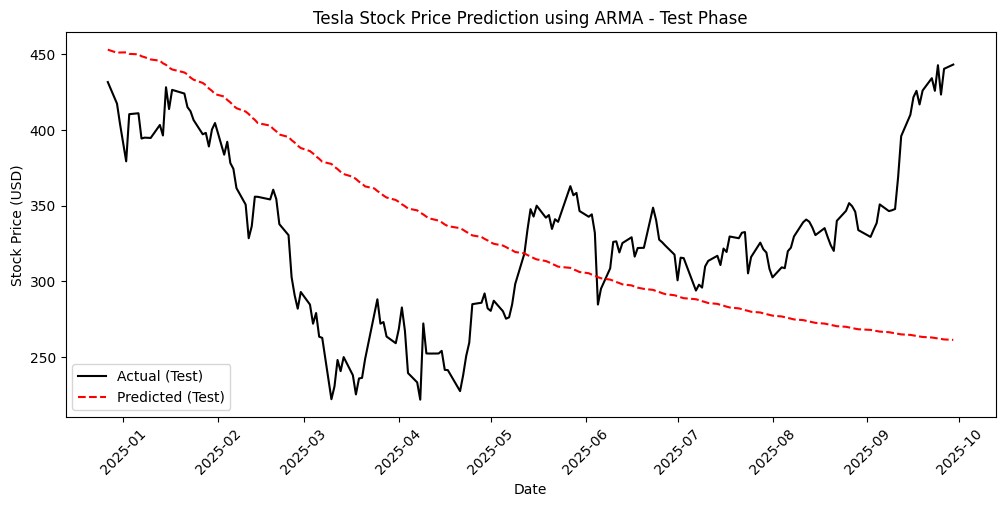

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size].copy(), df.iloc[train_size:].copy()  # ✅ `.copy()` 추가

# 📌 3️⃣ 최적의 (p, q) 값 찾기 (AIC 기준)
pq_selection = arma_order_select_ic(train["Close"], max_ar=5, max_ma=5, ic='aic', trend='n')
best_p, best_q = pq_selection.aic_min_order

# 📌 4️⃣ 결과 출력
print(f"✅ 최적의 (p, q) 값: (p={best_p}, q={best_q})")

# 📌 5️⃣ AIC 결과를 시각화
aic_matrix = pq_selection.aic  # AIC 값 행렬
plt.figure(figsize=(8, 6))
sns.heatmap(aic_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=range(aic_matrix.shape[1]), yticklabels=range(aic_matrix.shape[0]))
plt.xlabel("q (MA 차수)")
plt.ylabel("p (AR 차수)")
plt.title("AIC Heatmap for ARMA Model")
plt.show()

# 📌 6️⃣ 최적의 (p, q) 값으로 ARMA 모델 학습
model = ARIMA(train["Close"], order=(best_p, 0, best_q))  # 차분(d=0) 사용하여 ARMA 모델 구축
model_fit = model.fit()

# 📌 7️⃣ 예측 수행
train_pred = model_fit.predict(start=best_p, end=len(train) - 1)  # 훈련 데이터 예측
test_pred = model_fit.predict(start=len(train), end=len(df) - 1)  # 테스트 데이터 예측

# 📌 8️⃣ 성능 평가
train_actual = train["Close"][best_p:]  # 실제값
test_actual = test["Close"]

train_mse = mean_squared_error(train_actual, train_pred)
test_mse = mean_squared_error(test_actual, test_pred)
train_r2 = r2_score(train_actual, train_pred)
test_r2 = r2_score(test_actual, test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 9️⃣ 결과 시각화 (전체 데이터 예측)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Actual", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (ARMA Model)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using ARMA Model")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(train["Date"][best_p:], train_actual, label="Actual (Training)", color="black")
plt.plot(train["Date"][best_p:], train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ARMA - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 1️⃣1️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(test["Date"], test_actual, label="Actual (Test)", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (Test)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using ARMA - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ 롤링 예측 적용
- 다음 코드는 테스트 데이터 예측 시 항상 이전 실제값을 사용하여 한 스텝씩 예측하는 방식으로 개선
- 시계열 예측 모델(ARMA 포함)은 일반적으로 "한 스텝씩" 미래 값을 예측해야 함
-  ARMA 모델은 이전 예측값이 아닌 실제 데이터를 기반으로 매일 업데이트되며 예측해야 더욱 신뢰도가 높아짐
- 이를 해결하기 위해 롤링 예측 (Rolling Forecast, Walk-forward Forecasting) 기법을 적용

/tmp/ipython-input-3770060026.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodel

✅ 최적의 (p, q) 값: (p=3, q=5)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


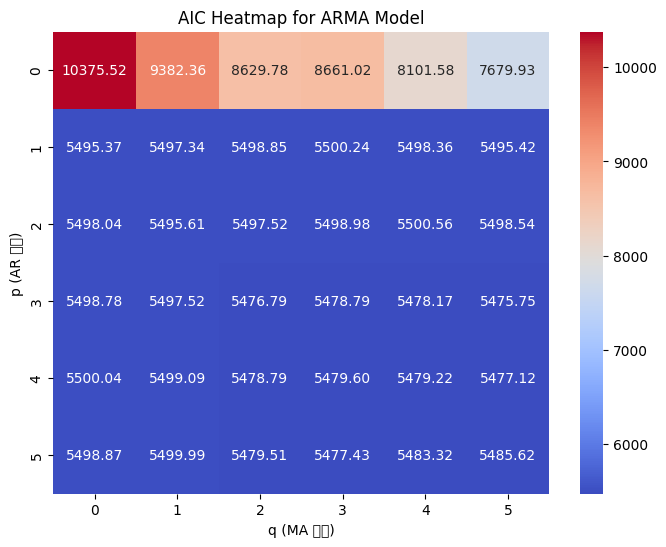

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-3770060026.py:48: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  history.append(float(test["Close"].iloc[t]))  # ✅ float 변환 추가
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

📌 Training MSE: 85.5390, R²: 0.9759
📌 Test MSE: 173.4115, R²: 0.9413


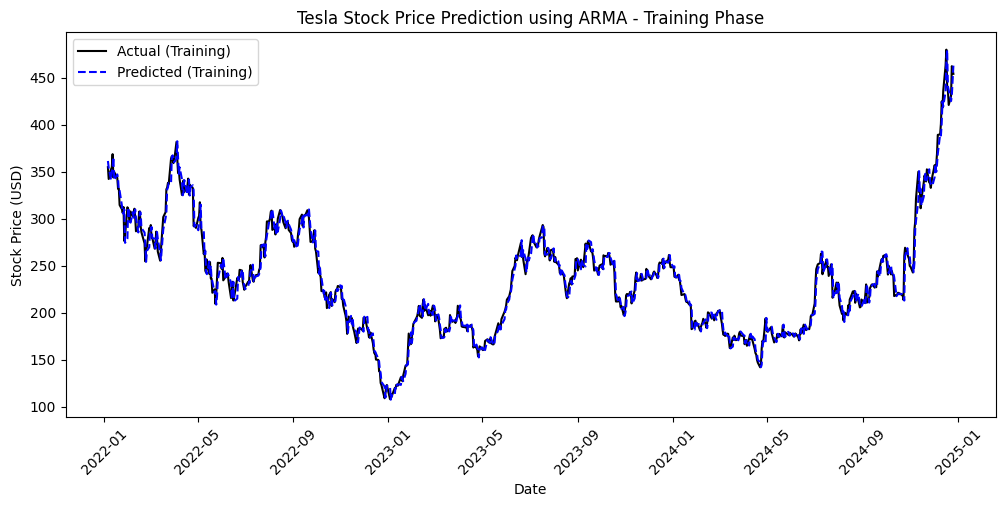

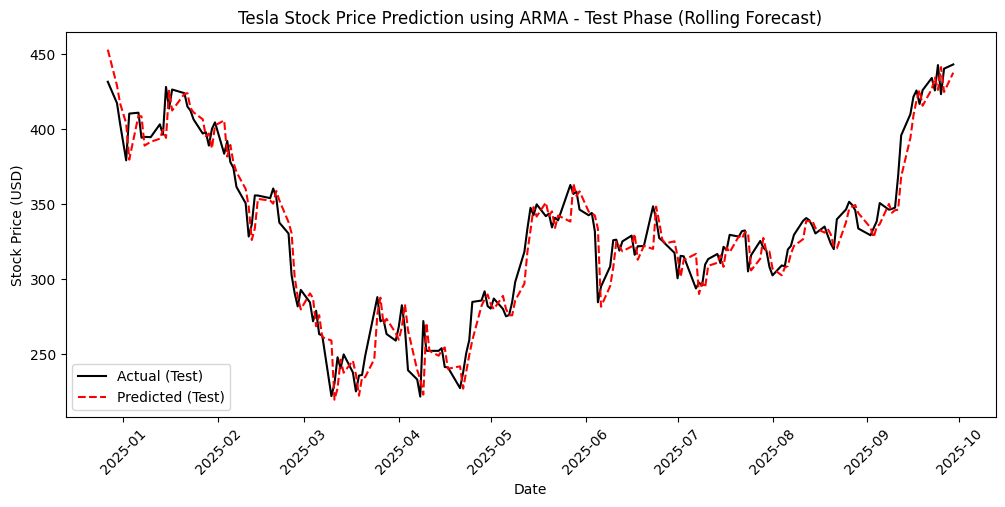

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")
df = df.reset_index()

# 📌 2️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size].copy(), df.iloc[train_size:].copy()

# 📌 3️⃣ 최적의 (p, q) 값 찾기 (AIC 기준)
pq_selection = arma_order_select_ic(train["Close"], max_ar=5, max_ma=5, ic='aic', trend='n')
best_p, best_q = pq_selection.aic_min_order
print(f"✅ 최적의 (p, q) 값: (p={best_p}, q={best_q})")

# 📌 4️⃣ AIC 결과를 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(pq_selection.aic, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=range(pq_selection.aic.shape[1]), yticklabels=range(pq_selection.aic.shape[0]))
plt.xlabel("q (MA 차수)")
plt.ylabel("p (AR 차수)")
plt.title("AIC Heatmap for ARMA Model")
plt.show()

# 📌 5️⃣ ARMA(p, q) 모델 학습
model = ARIMA(train["Close"], order=(best_p, 0, best_q))  # ✅ 차분(d=0) 사용 (ARMA 모델)
model_fit = model.fit()

# 📌 6️⃣ 훈련 데이터 예측
train_pred = model_fit.predict(start=best_p, end=len(train) - 1)

# 📌 7️⃣ 테스트 데이터 롤링 예측 (One-step forecasting)
rolling_predictions = []
history = train["Close"].squeeze().tolist()  # ✅ 해결 코드 적용

for t in range(len(test)):
    model = ARIMA(history, order=(best_p, 0, best_q))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=1)
    rolling_predictions.append(pred[0])
    history.append(float(test["Close"].iloc[t]))  # ✅ float 변환 추가

# 📌 8️⃣ 성능 평가
train_actual = train["Close"][best_p:]  # 실제값
test_actual = test["Close"]

train_mse = mean_squared_error(train_actual, train_pred)
test_mse = mean_squared_error(test_actual, rolling_predictions)
train_r2 = r2_score(train_actual, train_pred)
test_r2 = r2_score(test_actual, rolling_predictions)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 9️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(train["Date"][best_p:], train_actual, label="Actual (Training)", color="black")
plt.plot(train["Date"][best_p:], train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ARMA - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(test["Date"], test_actual, label="Actual (Test)", color="black")
plt.plot(test["Date"], rolling_predictions, label="Predicted (Test)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using ARMA - Test Phase (Rolling Forecast)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ ARMA(p,q)

* Full series

전체 수익률로 한 번 적합 → 미래 h-step 예측. 평가용보다는 최종 모델 적합·시나리오링에 적합.

* Fixed-origin(정적 파라미터)

학습(처음 80%)에서 한 번 적합 → 테스트 전 구간 동적 멀티-스텝(실제값 미사용) 예측. 가장 엄격한 OOS.

* Rolling window

매 시점 최근 W개만으로 모수 재추정 → 바로 다음 1-step 예측. 드리프트 대응 좋고 계산량 일정.
(여기서는 계산량 완화 위해 reselect_stride 간격으로 (p,q) 재선택)

* Expanding window

처음부터 t−1까지 전부로 매 시점 모수 재추정 → 1-step 예측. 데이터 축적에 따라 안정적이지만 적응은 느림.

In [5]:
# ==================== Colab 준비 ====================
# %%capture
# %pip -q install yfinance statsmodels scikit-learn pandas numpy matplotlib

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import warnings

plt.rcParams["figure.figsize"] = (12, 5)
warnings.filterwarnings("ignore", message="Non-invertible")  # 보기좋게(근본원인은 아래에서 해결)

# ==================== 데이터 로드 ====================
symbol     = "TSLA"
start_date = "2022-01-01"
end_date   = "2024-01-01"   # 필요시 변경

px = yf.download(symbol, start=start_date, end=end_date).reset_index()
px = px[["Date", "Close"]].dropna().copy()
px["Date"] = pd.to_datetime(px["Date"])

# 로그수익률(%) — ARMA는 정상성을 요구하므로 레벨 대신 수익률 사용
ret = np.log(px["Close"]).diff().dropna().to_numpy() * 100.0
ret_dates = px["Date"].iloc[1:].to_numpy()  # 수익률 날짜(가격보다 1개 짧음)

n_price = len(px)
n_ret   = len(ret)
split_price = int(n_price * 0.8)
split_ret   = split_price - 1   # 수익률 인덱스 기준 분할점

px_train = px.iloc[:split_price].copy()
px_test  = px.iloc[split_price:].copy()

ret_train = ret[:split_ret].copy()
ret_test  = ret[split_ret:].copy()

dates_train = px_train["Date"].to_numpy()
dates_test  = px_test["Date"].to_numpy()

print(f"Prices: total={n_price}, train={len(px_train)}, test={len(px_test)}")
print(f"Returns: total={n_ret},   train={len(ret_train)}, test={len(ret_test)}")

# ==================== 유틸/헬퍼 ====================
def rmse(a, b): return float(np.sqrt(mean_squared_error(a, b)))
def mae(a, b):  return float(np.mean(np.abs(a - b)))
def r2(a, b):   return float(r2_score(a, b))

def to_price_path(p0, returns_pct):
    """시작가격 p0와 수익률(%) 시계열로 가격 경로 복원."""
    out = np.empty(len(returns_pct), dtype=float)
    prev = float(p0)
    for i, r in enumerate(returns_pct):
        prev = prev * np.exp(float(r) / 100.0)
        out[i] = prev
    return out

def arma_forecast_1step(y_win, p, q):
    """ARMA(p,q)=ARIMA(p,0,q) 1-step 예측. 실패/짧은 창은 평균으로 대체."""
    min_obs = max(30, p + q + 5)  # 너무 짧은 창에서의 불안정/워닝 방지
    if len(y_win) < min_obs:
        return float(np.mean(y_win[-max(5, min(len(y_win), p+q)):]))  # 간단한 fallback

    try:
        model = ARIMA(
            y_win, order=(p, 0, q), trend="n",
            enforce_stationarity=True, enforce_invertibility=True
        )
        fit = model.fit(method_kwargs={"maxiter": 200})
        yhat = float(fit.forecast(steps=1)[0])
        return yhat
    except Exception:
        # 수렴 실패/경계 문제 등은 단순 평균으로 fallback (워닝/에러 회피)
        return float(np.mean(y_win[-max(5, min(len(y_win), p+q)):]))


# ==================== 하이퍼파라미터 ====================
p, q = 2, 2     # ARMA 차수(필요시 조정)
W     = 120     # Rolling 창 길이(영업일 기준 ~6개월)
h     = 20      # Full-series 미래 예측 길이

/tmp/ipython-input-2844469945.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  px = yf.download(symbol, start=start_date, end=end_date).reset_index()
[*********************100%***********************]  1 of 1 completed

Prices: total=501, train=400, test=101
Returns: total=500,   train=399, test=101


/tmp/ipython-input-854629119.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p0 = float(px["Close"].iloc[-1])  # 마지막 관측 가격


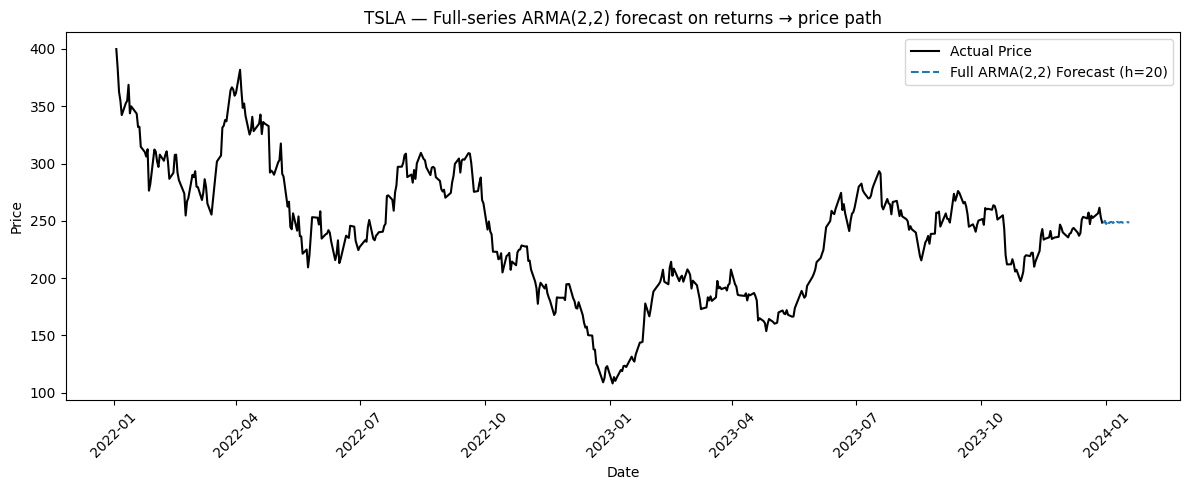

In [6]:
# ==================== A) Full series ====================
# 전체(수익률)로 적합 → 미래 h-step 수익률 예측 → 가격으로 복원
model_full = ARIMA(
    ret, order=(p, 0, q), trend="n",
    enforce_stationarity=True, enforce_invertibility=True
).fit(method_kwargs={"maxiter": 200})
ret_pred_full = model_full.forecast(steps=h).astype(float)

p0 = float(px["Close"].iloc[-1])  # 마지막 관측 가격
px_pred_full = to_price_path(p0, ret_pred_full)

# 그래프: 전체 + 미래경로(가격)
future_dates = pd.date_range(px["Date"].iloc[-1] + pd.Timedelta(days=1), periods=h, freq="D")
plt.figure()
plt.plot(px["Date"], px["Close"], label="Actual Price", color="black")
plt.plot(future_dates, px_pred_full, label=f"Full ARMA({p},{q}) Forecast (h={h})", linestyle="--")
plt.title(f"{symbol} — Full-series ARMA({p},{q}) forecast on returns → price path")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

[Fixed-origin static on returns] RMSE=2.9684 | MAE=2.2107 | R2=0.0009


/tmp/ipython-input-1424824848.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p0_test = float(px_train["Close"].iloc[-1])     # 테스트 시작 직전 가격


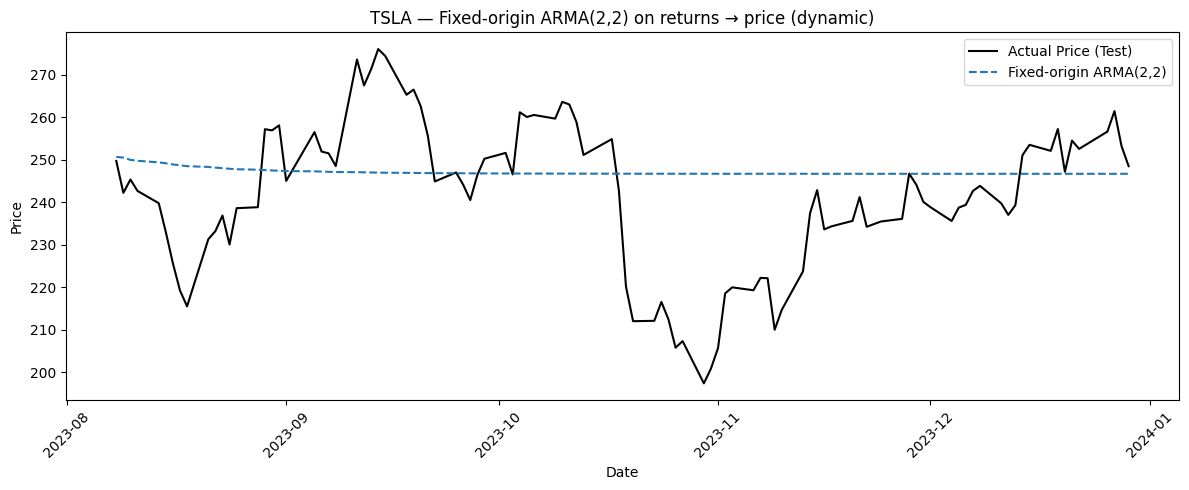

In [7]:
# ==================== B) Fixed-origin(정적 파라미터) ====================
# Train 수익률로 한 번 적합 → Test 길이만큼 동적 예측(실제값 미사용)
model_static = ARIMA(
    ret_train, order=(p, 0, q), trend="n",
    enforce_stationarity=True, enforce_invertibility=True
).fit(method_kwargs={"maxiter": 200})

ret_pred_static = model_static.forecast(steps=len(ret_test)).astype(float)

# 성능(수익률 도메인)
rmse_b = rmse(ret_test, ret_pred_static)
mae_b  = mae(ret_test, ret_pred_static)
r2_b   = r2(ret_test, ret_pred_static)
print(f"[Fixed-origin static on returns] RMSE={rmse_b:.4f} | MAE={mae_b:.4f} | R2={r2_b:.4f}")

# 가격 도메인 그래프: 테스트 구간
p0_test = float(px_train["Close"].iloc[-1])     # 테스트 시작 직전 가격
px_pred_static = to_price_path(p0_test, ret_pred_static)

plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black")
plt.plot(dates_test, px_pred_static, label=f"Fixed-origin ARMA({p},{q})", linestyle="--")
plt.title(f"{symbol} — Fixed-origin ARMA({p},{q}) on returns → price (dynamic)")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[Rolling window on returns] RMSE=3.0111 | MAE=2.3165 | R2=-0.0280


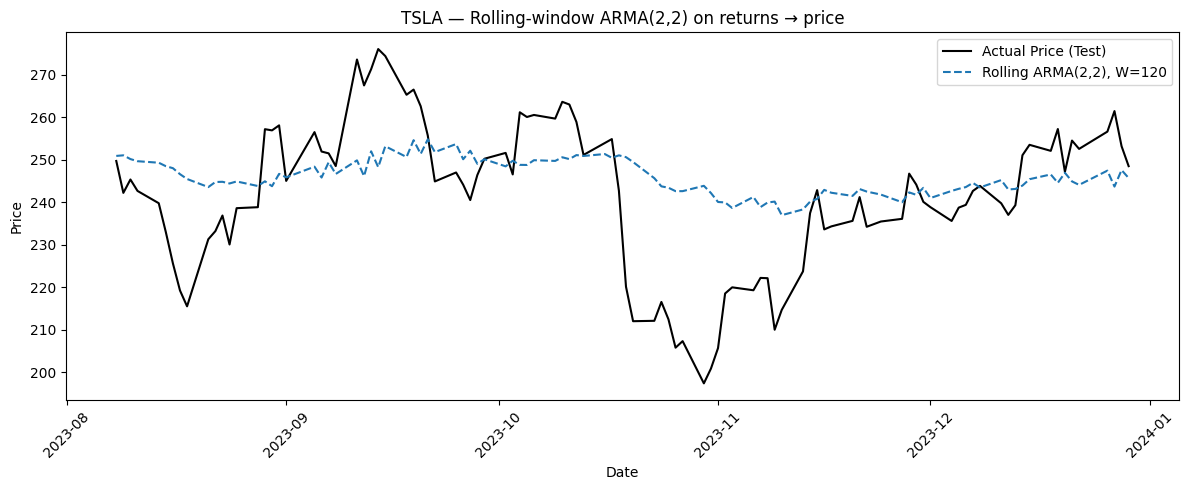

In [8]:
# ==================== C) Rolling window ====================
# 직전 W개 수익률로 매 시점 재적합 → 1-step 수익률 예측
ret_pred_roll = np.full(len(ret_test), np.nan, dtype=float)

hist = np.copy(ret_train)  # 실제 수익률 기록(학습 + 테스트 앞부분 실제)
for i in range(len(ret_test)):
    y_win = hist[-W:] if len(hist) >= W else hist
    yhat = arma_forecast_1step(y_win, p=p, q=q)
    ret_pred_roll[i] = yhat
    # 롤링은 다음 시점 준비 시 '실제값'을 누적(워크-포워드 평가)
    hist = np.append(hist, ret_test[i])

# 성능(수익률 도메인)
rmse_c = rmse(ret_test, ret_pred_roll)
mae_c  = mae(ret_test, ret_pred_roll)
r2_c   = r2(ret_test, ret_pred_roll)
print(f"[Rolling window on returns] RMSE={rmse_c:.4f} | MAE={mae_c:.4f} | R2={r2_c:.4f}")

# 가격 도메인 그래프
px_pred_roll = to_price_path(p0_test, ret_pred_roll)
plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black")
plt.plot(dates_test, px_pred_roll, label=f"Rolling ARMA({p},{q}), W={W}", linestyle="--")
plt.title(f"{symbol} — Rolling-window ARMA({p},{q}) on returns → price")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

[Expanding window on returns] RMSE=2.9951 | MAE=2.2623 | R2=-0.0171


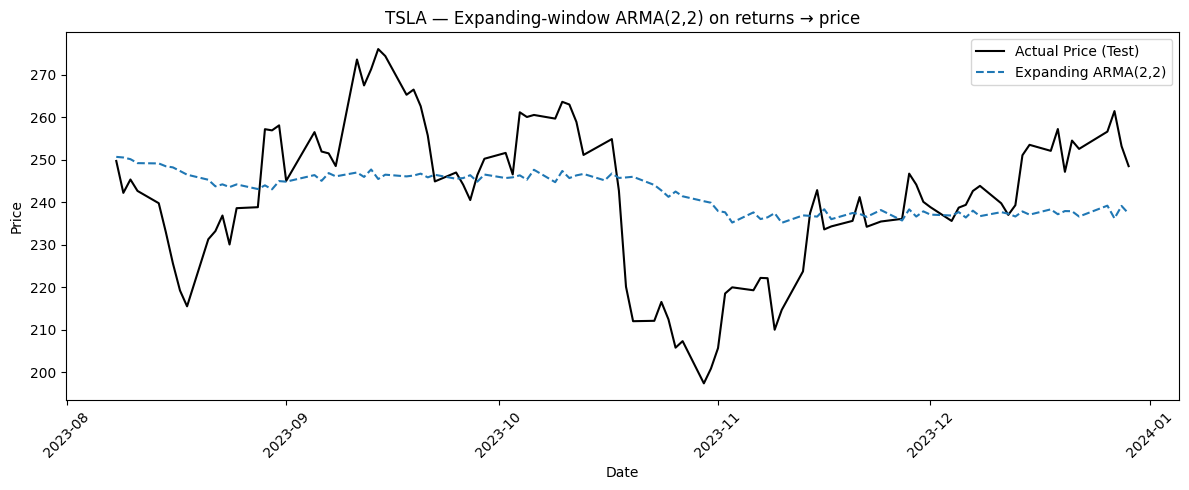

In [9]:

# ==================== D) Expanding window ====================
# 처음부터 t-1까지 수익률 전부로 매 시점 재적합 → 1-step 수익률 예측
ret_pred_exp = np.full(len(ret_test), np.nan, dtype=float)

hist = np.copy(ret_train)
for i in range(len(ret_test)):
    # 확장 윈도우: 전체 hist 사용
    yhat = arma_forecast_1step(hist, p=p, q=q)
    ret_pred_exp[i] = yhat
    hist = np.append(hist, ret_test[i])  # 다음 시점 준비(실제값 누적)

# 성능(수익률 도메인)
rmse_d = rmse(ret_test, ret_pred_exp)
mae_d  = mae(ret_test, ret_pred_exp)
r2_d   = r2(ret_test, ret_pred_exp)
print(f"[Expanding window on returns] RMSE={rmse_d:.4f} | MAE={mae_d:.4f} | R2={r2_d:.4f}")

# 가격 도메인 그래프
px_pred_exp = to_price_path(p0_test, ret_pred_exp)
plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black")
plt.plot(dates_test, px_pred_exp, label=f"Expanding ARMA({p},{q})", linestyle="--")
plt.title(f"{symbol} — Expanding-window ARMA({p},{q}) on returns → price")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()


=== Summary on Returns (lower is better, R2→1) ===


,Method,RMSE(ret),MAE(ret),R2(ret)
0,"Fixed-origin ARMA(2,2)",2.968391,2.210744,0.000890
2,"Expanding ARMA(2,2)",2.995053,2.262349,-0.017139
1,"Rolling ARMA(2,2), W=120",3.011052,2.316483,-0.028034


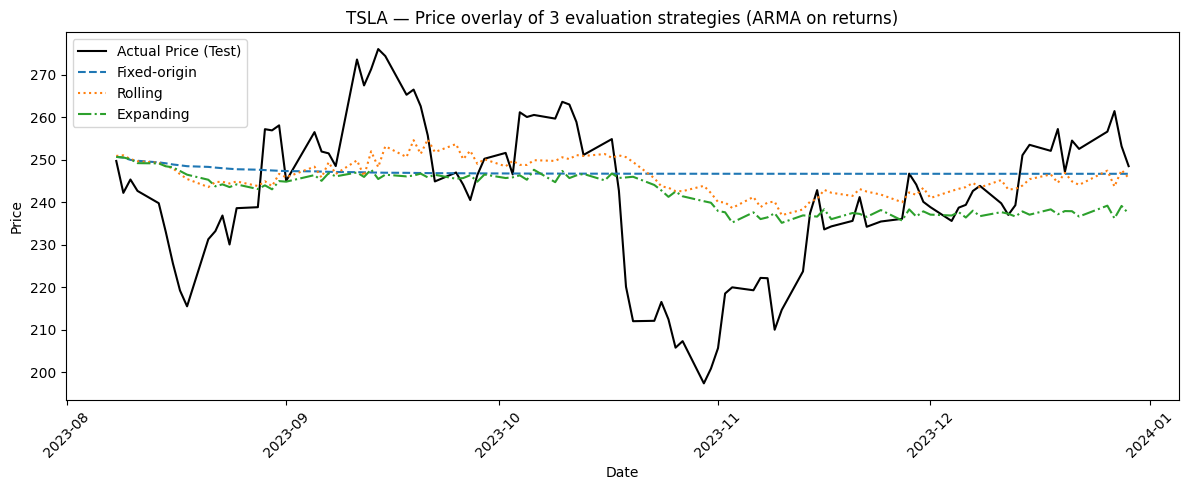

In [10]:
# ==================== 요약(수익률 기준 지표) & 오버레이 ====================
summary = pd.DataFrame({
    "Method": [
        f"Fixed-origin ARMA({p},{q})",
        f"Rolling ARMA({p},{q}), W={W}",
        f"Expanding ARMA({p},{q})"
    ],
    "RMSE(ret)": [rmse_b, rmse_c, rmse_d],
    "MAE(ret)":  [mae_b,  mae_c,  mae_d],
    "R2(ret)":   [r2_b,   r2_c,   r2_d]
})
print("\n=== Summary on Returns (lower is better, R2→1) ===")
display(summary.sort_values("RMSE(ret)"))

plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black", linewidth=1.5)
plt.plot(dates_test, px_pred_static, label="Fixed-origin", linestyle="--")
plt.plot(dates_test, px_pred_roll,   label="Rolling",     linestyle=":")
plt.plot(dates_test, px_pred_exp,    label="Expanding",   linestyle="-.")
plt.title(f"{symbol} — Price overlay of 3 evaluation strategies (ARMA on returns)")
plt.xlabel("Date"); plt.ylabel("Price")
plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()


In [11]:
정지

NameError: name '정지' is not defined

## 최적의 p,q를 각각 찾아서 예측

In [ ]:
# ==================== Colab 준비 ====================
# %%capture
%pip -q install yfinance statsmodels seaborn scikit-learn pandas numpy matplotlib

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic
from sklearn.metrics import mean_squared_error, r2_score
import warnings

plt.rcParams["figure.figsize"] = (12, 5)
sns.set_theme(style="whitegrid")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message="Non-invertible")
warnings.filterwarnings("ignore", message="convergence")

# ==================== 데이터 로드 ====================
symbol     = "TSLA"
start_date = "2022-01-01"
end_date   = "2025-09-30"   # 필요 시 조정

px = yf.download(symbol, start=start_date, end=end_date).reset_index()
px = px[["Date", "Close"]].dropna().copy()
px["Date"] = pd.to_datetime(px["Date"])

# 로그수익률(%) — ARMA 정상성 보장을 위해 레벨이 아니라 수익률 사용
ret = np.log(px["Close"]).diff().dropna().to_numpy() * 100.0
ret_dates = px["Date"].iloc[1:].to_numpy()

n_price = len(px)
n_ret   = len(ret)
split_price = int(n_price * 0.8)
split_ret   = split_price - 1   # 수익률 기준 분할점

px_train = px.iloc[:split_price].copy()
px_test  = px.iloc[split_price:].copy()

ret_train = ret[:split_ret].copy()
ret_test  = ret[split_ret:].copy()

dates_train = px_train["Date"].to_numpy()
dates_test  = px_test["Date"].to_numpy()

print(f"Prices: total={n_price}, train={len(px_train)}, test={len(px_test)}")
print(f"Returns: total={n_ret},   train={len(ret_train)}, test={len(ret_test)}")

# ==================== 유틸/헬퍼 ====================
def rmse(a, b): return float(np.sqrt(mean_squared_error(a, b)))
def mae(a, b):  return float(np.mean(np.abs(a - b)))
def r2(a, b):   return float(r2_score(a, b))

def to_price_path(p0, returns_pct):
    """시작가격 p0와 수익률(%) 시계열로 가격 경로 복원."""
    out = np.empty(len(returns_pct), dtype=float)
    prev = float(p0)
    for i, r in enumerate(returns_pct):
        prev = prev * np.exp(float(r) / 100.0)
        out[i] = prev
    return out

def fit_arma_safe(y, order):
    """ARMA(p,0,q) 안전 적합 (제약+예외 처리). 실패 시 None."""
    p, q = order
    try:
        model = ARIMA(
            y, order=(p, 0, q), trend="n",
            enforce_stationarity=True, enforce_invertibility=True
        )
        fit = model.fit(method_kwargs={"maxiter": 200})
        return fit
    except Exception:
        return None

def one_step_forecast(y_win, order, min_obs=40, fallback_k=10):
    """
    주어진 윈도우에서 1-step 수익률 예측.
    - 관측치가 너무 짧거나 적합 실패 시: 최근 fallback_k개 평균으로 대체.
    """
    if len(y_win) < max(min_obs, order[0] + order[1] + 5):
        # 간단 fallback
        k = min(fallback_k, len(y_win))
        return float(np.mean(y_win[-k:]))
    fit = fit_arma_safe(y_win, order)
    if fit is None:
        k = min(fallback_k, len(y_win))
        return float(np.mean(y_win[-k:]))
    return float(fit.forecast(steps=1)[0])

def select_order_ic(y, max_ar=5, max_ma=5, ic="aic", trend="n"):
    """
    arma_order_select_ic로 (p,q) 선택 + AIC 행렬 반환(DataFrame).
    실패 시 (1,1)과 None 반환.
    """
    try:
        res = arma_order_select_ic(
            y, max_ar=max_ar, max_ma=max_ma, ic=[ic], trend=trend
        )
        best = res.aic_min_order if ic == "aic" else res.bic_min_order
        aic_matrix = pd.DataFrame(res.aic,
                                  index=range(res.aic.shape[0]),
                                  columns=range(res.aic.shape[1]))
        return best, aic_matrix
    except Exception:
        return (1, 1), None

def plot_aic_heatmap(aic_matrix, title):
    if aic_matrix is None:
        print("[AIC heatmap] 생성 불가 (행렬 없음)")
        return
    plt.figure(figsize=(8, 6))
    sns.heatmap(aic_matrix, annot=True, fmt=".2f")
    plt.xlabel("q (MA order)")
    plt.ylabel("p (AR order)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# ==================== 하이퍼파라미터(기본값) ====================
MAX_AR = 5
MAX_MA = 5
W = 120               # Rolling 창 길이
reselect_stride = 10  # Rolling/Expanding에서 몇 스텝마다 (p,q) 재선택할지 (계산량 제어)
h = 20                # Full-series 미래 예측 길이

# ==================== A) Full series — (p,q) 자동선택 ====================
best_full, aic_full = select_order_ic(ret, max_ar=MAX_AR, max_ma=MAX_MA, ic="aic", trend="n")
print(f"[Full] best (p,q) by AIC:", best_full)
plot_aic_heatmap(aic_full, f"{symbol} Full-series AIC Heatmap (returns)")

fit_full = fit_arma_safe(ret, best_full)
ret_pred_full = fit_full.forecast(steps=h).astype(float) if fit_full is not None else np.full(h, np.mean(ret[-10:]))
p0 = float(px["Close"].iloc[-1])
px_pred_full = to_price_path(p0, ret_pred_full)

future_dates = pd.date_range(px["Date"].iloc[-1] + pd.Timedelta(days=1), periods=h, freq="D")
plt.figure()
plt.plot(px["Date"], px["Close"], label="Actual Price", color="black")
plt.plot(future_dates, px_pred_full, label=f"Full ARMA{best_full} (h={h})", linestyle="--")
plt.title(f"{symbol} — Full-series ARMA{best_full} on returns → price path")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# ==================== B) Fixed-origin(정적 파라미터) — (p,q) 자동선택 ====================
best_fix, aic_fix = select_order_ic(ret_train, max_ar=MAX_AR, max_ma=MAX_MA, ic="aic", trend="n")
print(f"[Fixed-origin] best (p,q) by AIC:", best_fix)
plot_aic_heatmap(aic_fix, f"{symbol} Fixed-origin AIC Heatmap (returns train)")

fit_static = fit_arma_safe(ret_train, best_fix)
ret_pred_static = fit_static.forecast(steps=len(ret_test)).astype(float) if fit_static is not None else np.full(len(ret_test), np.mean(ret_train[-10:]))

rmse_b = rmse(ret_test, ret_pred_static)
mae_b  = mae(ret_test, ret_pred_static)
r2_b   = r2(ret_test, ret_pred_static)
print(f"[Fixed-origin static on returns] RMSE={rmse_b:.4f} | MAE={mae_b:.4f} | R2={r2_b:.4f}")

p0_test = float(px_train["Close"].iloc[-1])
px_pred_static = to_price_path(p0_test, ret_pred_static)

plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black")
plt.plot(dates_test, px_pred_static, label=f"Fixed-origin ARMA{best_fix}", linestyle="--")
plt.title(f"{symbol} — Fixed-origin ARMA{best_fix} (dynamic forecast on returns → price)")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# ==================== C) Rolling window — 윈도우별 (p,q) 자동선택 ====================
ret_pred_roll = np.full(len(ret_test), np.nan, dtype=float)
hist = np.copy(ret_train)
current_order = None

for i in range(len(ret_test)):
    y_win = hist[-W:] if len(hist) >= W else hist
    if (i % reselect_stride == 0) or (current_order is None):
        current_order, _ = select_order_ic(y_win, max_ar=MAX_AR, max_ma=MAX_MA, ic="aic", trend="n")
    ret_pred_roll[i] = one_step_forecast(y_win, current_order, min_obs=40, fallback_k=10)
    # 다음 시점 준비: 실제 수익률 누적(워크-포워드)
    hist = np.append(hist, ret_test[i])

rmse_c = rmse(ret_test, ret_pred_roll)
mae_c  = mae(ret_test, ret_pred_roll)
r2_c   = r2(ret_test, ret_pred_roll)
print(f"[Rolling window on returns] RMSE={rmse_c:.4f} | MAE={mae_c:.4f} | R2={r2_c:.4f}")

px_pred_roll = to_price_path(p0_test, ret_pred_roll)
plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black")
plt.plot(dates_test, px_pred_roll, label=f"Rolling ARMA (AIC, W={W}, stride={reselect_stride})", linestyle="--")
plt.title(f"{symbol} — Rolling-window ARMA(AIC-selected) on returns → price")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# ==================== D) Expanding window — 누적구간별 (p,q) 자동선택 ====================
ret_pred_exp = np.full(len(ret_test), np.nan, dtype=float)
hist = np.copy(ret_train)
current_order = None

for i in range(len(ret_test)):
    if (i % reselect_stride == 0) or (current_order is None):
        current_order, _ = select_order_ic(hist, max_ar=MAX_AR, max_ma=MAX_MA, ic="aic", trend="n")
    ret_pred_exp[i] = one_step_forecast(hist, current_order, min_obs=40, fallback_k=10)
    hist = np.append(hist, ret_test[i])

rmse_d = rmse(ret_test, ret_pred_exp)
mae_d  = mae(ret_test, ret_pred_exp)
r2_d   = r2(ret_test, ret_pred_exp)
print(f"[Expanding window on returns] RMSE={rmse_d:.4f} | MAE={mae_d:.4f} | R2={r2_d:.4f}")

px_pred_exp = to_price_path(p0_test, ret_pred_exp)
plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black")
plt.plot(dates_test, px_pred_exp, label=f"Expanding ARMA (AIC, stride={reselect_stride})", linestyle="--")
plt.title(f"{symbol} — Expanding-window ARMA(AIC-selected) on returns → price")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# ==================== 요약(수익률 기준 지표) & 오버레이 ====================
summary = pd.DataFrame({
    "Method": [
        f"Fixed-origin ARMA{best_fix}",
        f"Rolling ARMA (AIC, W={W}, stride={reselect_stride})",
        f"Expanding ARMA (AIC, stride={reselect_stride})"
    ],
    "RMSE(ret)": [rmse_b, rmse_c, rmse_d],
    "MAE(ret)":  [mae_b,  mae_c,  mae_d],
    "R2(ret)":   [r2_b,   r2_c,   r2_d]
})
print("\n=== Summary on Returns (lower is better, R2→1) ===")
display(summary.sort_values("RMSE(ret)"))

plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black", linewidth=1.5)
plt.plot(dates_test, to_price_path(p0_test, ret_pred_static), label="Fixed-origin", linestyle="--")
plt.plot(dates_test, px_pred_roll,   label="Rolling",     linestyle=":")
plt.plot(dates_test, px_pred_exp,    label="Expanding",   linestyle="-.")
plt.title(f"{symbol} — Price overlay of 3 evaluation strategies (ARMA on returns, AIC-selected)")
plt.xlabel("Date"); plt.ylabel("Price")
plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()


## Expanding/Rolling 모두에서 (p,q) 재선택을 “주기적(reselect_stride)” + “조건부(AIC GAP 초과 시)”로 수행하고, Rolling은 주기적으로는 창 길이 W까지 후보군에서 자동 선택하도록 확장.

* 주기적 적응: reselect_stride 간격마다 (Expanding: 차수만 / Rolling: 차수+(창 길이 W))을 AIC로 재선택

* 조건부 적응(AIC Gap 트리거): 주기 사이에서도, 현재 모델의 AIC가 동 창에서의 최적 AIC보다 AIC_GAP만큼 나빠지면 즉시 재선택

* 안정화: 정상성(수익률 타깃), 제약(enforce_*), 최소 관측치, 실패 시 평균 대체


In [ ]:
# ==================== Colab 준비 ====================
# %%capture
%pip -q install yfinance statsmodels seaborn scikit-learn pandas numpy matplotlib

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic
from sklearn.metrics import mean_squared_error, r2_score
import warnings

plt.rcParams["figure.figsize"] = (12, 5)
sns.set_theme(style="whitegrid")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message="Non-invertible")
warnings.filterwarnings("ignore", message="convergence")

# ==================== 데이터 로드 ====================
symbol     = "TSLA"
start_date = "2022-01-01"
end_date   = "2025-09-30"   # 필요 시 조정

px = yf.download(symbol, start=start_date, end=end_date).reset_index()
px = px[["Date", "Close"]].dropna().copy()
px["Date"] = pd.to_datetime(px["Date"])

# 로그수익률(%) — ARMA 정상성 보장을 위해 레벨이 아니라 수익률 사용
ret = np.log(px["Close"]).diff().dropna().to_numpy() * 100.0
ret_dates = px["Date"].iloc[1:].to_numpy()

n_price = len(px)
n_ret   = len(ret)
split_price = int(n_price * 0.8)
split_ret   = split_price - 1   # 수익률 기준 분할점

px_train = px.iloc[:split_price].copy()
px_test  = px.iloc[split_price:].copy()

ret_train = ret[:split_ret].copy()
ret_test  = ret[split_ret:].copy()

dates_train = px_train["Date"].to_numpy()
dates_test  = px_test["Date"].to_numpy()

print(f"Prices: total={n_price}, train={len(px_train)}, test={len(px_test)}")
print(f"Returns: total={n_ret},   train={len(ret_train)}, test={len(ret_test)}")

# ==================== 유틸/헬퍼 ====================
def rmse(a, b): return float(np.sqrt(mean_squared_error(a, b)))
def mae(a, b):  return float(np.mean(np.abs(a - b)))
def r2(a, b):   return float(r2_score(a, b))

def to_price_path(p0, returns_pct):
    """시작가격 p0와 수익률(%) 시계열로 가격 경로 복원."""
    out = np.empty(len(returns_pct), dtype=float)
    prev = float(p0)
    for i, r in enumerate(returns_pct):
        prev = prev * np.exp(float(r) / 100.0)
        out[i] = prev
    return out

def fit_arma_safe(y, order):
    """ARMA(p,0,q) 안전 적합 (제약+예외 처리). 실패 시 None."""
    p, q = order
    try:
        model = ARIMA(
            y, order=(p, 0, q), trend="n",
            enforce_stationarity=True, enforce_invertibility=True
        )
        fit = model.fit(method_kwargs={"maxiter": 200})
        return fit
    except Exception:
        return None

def one_step_forecast(y_win, order, min_obs=40, fallback_k=10):
    """
    주어진 윈도우에서 1-step 수익률 예측.
    - 관측치가 너무 짧거나 적합 실패 시: 최근 fallback_k개 평균으로 대체.
    """
    if len(y_win) < max(min_obs, order[0] + order[1] + 5):
        k = min(fallback_k, len(y_win))
        return float(np.mean(y_win[-k:])) if k > 0 else 0.0
    fit = fit_arma_safe(y_win, order)
    if fit is None:
        k = min(fallback_k, len(y_win))
        return float(np.mean(y_win[-k:])) if k > 0 else 0.0
    return float(fit.forecast(steps=1)[0])

def select_order_ic(y, max_ar=5, max_ma=5, ic="aic", trend="n"):
    """
    arma_order_select_ic로 (p,q) 선택 + AIC 행렬 반환(DataFrame).
    실패 시 (1,1)과 None 반환.
    """
    try:
        res = arma_order_select_ic(
            y, max_ar=max_ar, max_ma=max_ma, ic=[ic], trend=trend
        )
        best = res.aic_min_order if ic == "aic" else res.bic_min_order
        aic_matrix = pd.DataFrame(res.aic,
                                  index=range(res.aic.shape[0]),
                                  columns=range(res.aic.shape[1]))
        return best, aic_matrix
    except Exception:
        return (1, 1), None

def best_aic_value(aic_matrix):
    if aic_matrix is None:
        return np.inf
    return float(np.nanmin(aic_matrix.values))

def evaluate_aic(y, order):
    """현재 order의 AIC를 계산. 적합 실패 시 +inf."""
    fit = fit_arma_safe(y, order)
    return float(fit.aic) if fit is not None else np.inf

def plot_aic_heatmap(aic_matrix, title):
    if aic_matrix is None:
        print("[AIC heatmap] 생성 불가 (행렬 없음)")
        return
    plt.figure(figsize=(8, 6))
    sns.heatmap(aic_matrix, annot=True, fmt=".2f")
    plt.xlabel("q (MA order)")
    plt.ylabel("p (AR order)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# ==================== 하이퍼파라미터(기본값) ====================
MAX_AR = 5
MAX_MA = 5
W = 120                         # Rolling 기본 창 길이
W_CANDIDATES = [60, 120, 240]   # ★ Rolling에서 주기적으로 W까지 자동선택
reselect_stride = 10            # 주기적 (p,q) 재선택 간격
AIC_GAP = 2.0                   # ★ 조건부 재선택 트리거(현재 AIC가 최적 AIC보다 이만큼 나쁘면 즉시 재선택)
h = 20                          # Full-series 미래 예측 길이

# ==================== A) Full series — (p,q) 자동선택 ====================
best_full, aic_full = select_order_ic(ret, max_ar=MAX_AR, max_ma=MAX_MA, ic="aic", trend="n")
print(f"[Full] best (p,q) by AIC:", best_full)
plot_aic_heatmap(aic_full, f"{symbol} Full-series AIC Heatmap (returns)")

fit_full = fit_arma_safe(ret, best_full)
ret_pred_full = fit_full.forecast(steps=h).astype(float) if fit_full is not None else np.full(h, np.mean(ret[-10:]))
p0 = float(px["Close"].iloc[-1])
px_pred_full = to_price_path(p0, ret_pred_full)

future_dates = pd.date_range(px["Date"].iloc[-1] + pd.Timedelta(days=1), periods=h, freq="D")
plt.figure()
plt.plot(px["Date"], px["Close"], label="Actual Price", color="black")
plt.plot(future_dates, px_pred_full, label=f"Full ARMA{best_full} (h={h})", linestyle="--")
plt.title(f"{symbol} — Full-series ARMA{best_full} on returns → price path")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# ==================== B) Fixed-origin(정적 파라미터) — (p,q) 자동선택 ====================
best_fix, aic_fix = select_order_ic(ret_train, max_ar=MAX_AR, max_ma=MAX_MA, ic="aic", trend="n")
print(f"[Fixed-origin] best (p,q) by AIC:", best_fix)
plot_aic_heatmap(aic_fix, f"{symbol} Fixed-origin AIC Heatmap (returns train)")

fit_static = fit_arma_safe(ret_train, best_fix)
ret_pred_static = fit_static.forecast(steps=len(ret_test)).astype(float) if fit_static is not None else np.full(len(ret_test), np.mean(ret_train[-10:]))

rmse_b = rmse(ret_test, ret_pred_static)
mae_b  = mae(ret_test, ret_pred_static)
r2_b   = r2(ret_test, ret_pred_static)
print(f"[Fixed-origin static on returns] RMSE={rmse_b:.4f} | MAE={mae_b:.4f} | R2={r2_b:.4f}")

p0_test = float(px_train["Close"].iloc[-1])
px_pred_static = to_price_path(p0_test, ret_pred_static)

plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black")
plt.plot(dates_test, px_pred_static, label=f"Fixed-origin ARMA{best_fix}", linestyle="--")
plt.title(f"{symbol} — Fixed-origin ARMA{best_fix} (dynamic forecast on returns → price)")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# ==================== C) Rolling window — (p,q) + (★주기적 W) 자동선택 + (★AIC GAP 조건부 재선택) ====================
ret_pred_roll = np.full(len(ret_test), np.nan, dtype=float)
hist = np.copy(ret_train)

# 초기 선택: W와 (p,q)를 동시에 최적화
def initial_select_rolling(hist):
    best_combo = {"W": None, "order": None, "best_aic": np.inf}
    for Wc in W_CANDIDATES:
        y_win = hist[-Wc:] if len(hist) >= Wc else hist
        order_c, aic_mat = select_order_ic(y_win, MAX_AR, MAX_MA, ic="aic", trend="n")
        aic_val = best_aic_value(aic_mat)
        if aic_val < best_combo["best_aic"]:
            best_combo = {"W": min(Wc, len(hist)), "order": order_c, "best_aic": aic_val}
    return best_combo["W"], best_combo["order"], best_combo["best_aic"]

current_W, current_order, current_best_aic = initial_select_rolling(hist)
print(f"[Rolling-init] W={current_W}, order={current_order}, best AIC={current_best_aic:.2f}")

for i in range(len(ret_test)):
    # 현재 창
    y_win = hist[-current_W:] if len(hist) >= current_W else hist

    # --- (1) 주기적 재선택: W 후보 + (p,q) 동시 재선택
    if (i % reselect_stride == 0) or (current_order is None):
        current_W, current_order, current_best_aic = initial_select_rolling(hist)

    # --- (2) 조건부 재선택: 같은 W에서 현재 order AIC가 최적 AIC보다 AIC_GAP 이상 나쁘면 즉시 재선택
    aic_now = evaluate_aic(y_win, current_order)
    # 같은 W에서의 최적 AIC
    order_w, aic_w = select_order_ic(y_win, MAX_AR, MAX_MA, ic="aic", trend="n")
    best_aic_w = best_aic_value(aic_w)
    if aic_now - best_aic_w > AIC_GAP:
        current_order = order_w
        current_best_aic = best_aic_w  # 기록 갱신

    # 1-step 예측
    ret_pred_roll[i] = one_step_forecast(y_win, current_order, min_obs=40, fallback_k=10)

    # 워크-포워드(실제값 추가)
    hist = np.append(hist, ret_test[i])

rmse_c = rmse(ret_test, ret_pred_roll)
mae_c  = mae(ret_test, ret_pred_roll)
r2_c   = r2(ret_test, ret_pred_roll)
print(f"[Rolling window on returns] RMSE={rmse_c:.4f} | MAE={mae_c:.4f} | R2={r2_c:.4f}")

px_pred_roll = to_price_path(p0_test, ret_pred_roll)
plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black")
plt.plot(dates_test, px_pred_roll, label=f"Rolling ARMA (AIC, W∈{W_CANDIDATES}, stride={reselect_stride}, gap={AIC_GAP})", linestyle="--")
plt.title(f"{symbol} — Rolling-window ARMA with adaptive (p,q) & W")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# ==================== D) Expanding window — (p,q) 자동선택 + (★AIC GAP 조건부 재선택) ====================
ret_pred_exp = np.full(len(ret_test), np.nan, dtype=float)
hist = np.copy(ret_train)
current_order = None

for i in range(len(ret_test)):
    # --- (1) 주기적 재선택: 누적 hist에서 (p,q) 재선택
    if (i % reselect_stride == 0) or (current_order is None):
        current_order, aic_hist = select_order_ic(hist, max_ar=MAX_AR, max_ma=MAX_MA, ic="aic", trend="n")
        current_best_aic = best_aic_value(aic_hist)

    # --- (2) 조건부 재선택: 같은 hist에서 현재 order AIC가 최적 AIC보다 AIC_GAP 이상 나쁘면 즉시 재선택
    aic_now = evaluate_aic(hist, current_order)
    order_h, aic_h = select_order_ic(hist, MAX_AR, MAX_MA, ic="aic", trend="n")
    best_aic_h = best_aic_value(aic_h)
    if aic_now - best_aic_h > AIC_GAP:
        current_order = order_h
        current_best_aic = best_aic_h

    # 1-step 예측
    ret_pred_exp[i] = one_step_forecast(hist, current_order, min_obs=40, fallback_k=10)

    # 워크-포워드(실제값 추가)
    hist = np.append(hist, ret_test[i])

rmse_d = rmse(ret_test, ret_pred_exp)
mae_d  = mae(ret_test, ret_pred_exp)
r2_d   = r2(ret_test, ret_pred_exp)
print(f"[Expanding window on returns] RMSE={rmse_d:.4f} | MAE={mae_d:.4f} | R2={r2_d:.4f}")

px_pred_exp = to_price_path(p0_test, ret_pred_exp)
plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black")
plt.plot(dates_test, px_pred_exp, label=f"Expanding ARMA (AIC, stride={reselect_stride}, gap={AIC_GAP})", linestyle="--")
plt.title(f"{symbol} — Expanding-window ARMA with adaptive (p,q)")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# ==================== 요약(수익률 기준 지표) & 오버레이 ====================
summary = pd.DataFrame({
    "Method": [
        f"Fixed-origin ARMA{best_fix}",
        f"Rolling ARMA (AIC, W∈{W_CANDIDATES}, stride={reselect_stride}, gap={AIC_GAP})",
        f"Expanding ARMA (AIC, stride={reselect_stride}, gap={AIC_GAP})"
    ],
    "RMSE(ret)": [rmse_b, rmse_c, rmse_d],
    "MAE(ret)":  [mae_b,  mae_c,  mae_d],
    "R2(ret)":   [r2_b,   r2_c,   r2_d]
})
print("\n=== Summary on Returns (lower is better, R2→1) ===")
display(summary.sort_values("RMSE(ret)"))

plt.figure()
plt.plot(dates_test, px_test["Close"].to_numpy(), label="Actual Price (Test)", color="black", linewidth=1.5)
plt.plot(dates_test, to_price_path(p0_test, ret_pred_static), label="Fixed-origin", linestyle="--")
plt.plot(dates_test, px_pred_roll,   label="Rolling (adaptive)",     linestyle=":")
plt.plot(dates_test, px_pred_exp,    label="Expanding (adaptive)",   linestyle="-.")
plt.title(f"{symbol} — Price overlay of strategies (ARMA on returns, adaptive AIC)")
plt.xlabel("Date"); plt.ylabel("Price")
plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()
